<a href="https://colab.research.google.com/github/jcmachicao/curso_ai_salud/blob/master/covid19__recup_letal_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = 'D://00 estable/2020_dat/corona_2021_feb_06.xlsx'

In [ ]:
data = pd.read_excel(path)

In [ ]:
data['death_pmillion'] = data.total_death/data.population*1e6

In [ ]:
data.head()

,Country,total_cases,new_cases,total_death,new_death,total_recov,new_recov,active,population,recov_p_millon,death_pmillion
0,Andorra,10206,34.0,105.0,1.0,9492.0,48.0,609.0,77339.0,121374.726852,1357.659137
1,Gibraltar,4177,7.0,80.0,NaN,3923.0,38.0,174.0,33685.0,114086.388600,2374.944337
2,Montenegro,64739,571.0,836.0,5.0,56228.0,475.0,7675.0,628114.0,88187.813040,1330.968582
3,Czechia,1030112,8559.0,17129.0,57.0,916789.0,457.0,96194.0,10720923.0,83916.282208,1597.716913
4,San Marino,3127,16.0,69.0,1.0,2795.0,21.0,263.0,33974.0,80237.828928,2030.964855


In [ ]:
data10 = data[['Country', 'recov_p_millon', 'death_pmillion']]

In [ ]:
data10[data10.Country=='Peru']

,Country,recov_p_millon,death_pmillion
38,Peru,31423.601555,1261.293454


In [ ]:
data10 = data10.dropna()

In [ ]:
data20 = data10.iloc[np.where( (data10.death_pmillion>100) & (data10.recov_p_millon>1000) )]
data20

,Country,recov_p_millon,death_pmillion
0,Andorra,121374.726852,1357.659137
1,Gibraltar,114086.388600,2374.944337
2,Montenegro,88187.813040,1330.968582
3,Czechia,83916.282208,1597.716913
4,San Marino,80237.828928,2030.964855
...,...,...,...
131,Belgium,2434.788386,1832.631793
132,Comoros,2431.274756,119.235801
133,France,2340.043802,1202.610483
138,Montserrat,2202.643172,200.240288


In [ ]:
# Definición de la tendencia lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lm = LinearRegression()
x = np.log(data10.death_pmillion.to_numpy().reshape(-1,1))
y = np.log(data10.recov_p_millon.to_numpy().reshape(-1,1))
lm.fit(x, y)
y_pred = lm.predict(x)
y_px = np.exp(y_pred)
y_px[0:10]

array([[45564.05601085],
       [73652.06482014],
       [44793.73488208],
       [52401.65842659],
       [64391.83517142],
       [33126.28050751],
       [56309.12518092],
       [20964.98207347],
       [42322.20126954],
       [29563.92987319]])

In [ ]:
x_px = np.exp(x)
len(x_px)

198

In [ ]:
r2_score(y, y_pred), mean_squared_error(y, y_pred)

(0.7534258785154951, 1.0197147562451738)

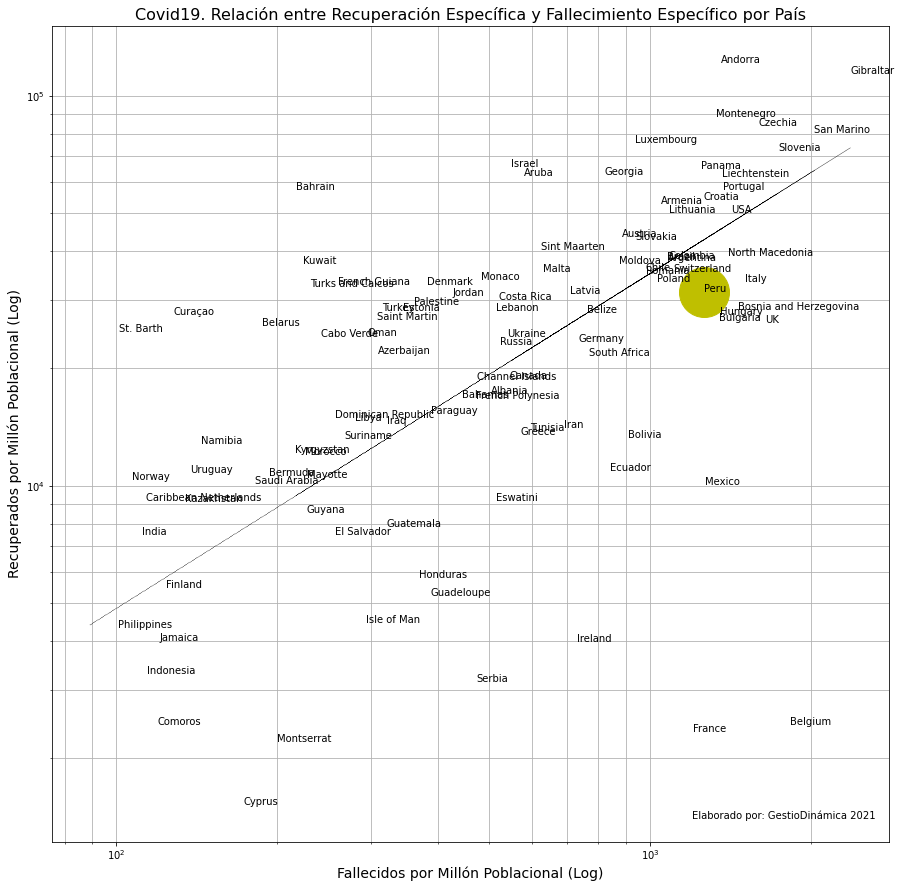

In [ ]:
plt.figure(figsize=(15,15), facecolor='white')
#plt.scatter(data.population, data.recov_p_millon)

for _, row in data20.iterrows():
    #print(row.population, row.recov_p_millon, row.Country)
    plt.plot(row.death_pmillion, row.recov_p_millon, ms=100)
    plt.text(row.death_pmillion, row.recov_p_millon, row.Country, fontsize=10)
    if row.Country in ['Peru']: #'['Brazil', 'Chile']
        plt.plot(row.death_pmillion, row.recov_p_millon, 'yo', ms=50)
plt.plot(x_px[:20], y_px[:20], 'k:', lw=0.5)
plt.grid(True, which='both')
plt.text(1200,1400,'Elaborado por: GestioDinámica 2021')
plt.xlabel('Fallecidos por Millón Poblacional (Log)', fontsize=14)
plt.ylabel('Recuperados por Millón Poblacional (Log)', fontsize=14)
plt.title('Covid19. Relación entre Recuperación Específica y Fallecimiento Específico por País', fontsize=16)
plt.yscale('log')
plt.xscale('log')
plt.savefig('D://correlacionc19.png')
plt.show()

In [ ]:
lm.coef_

array([[0.85876736]])

In [ ]:
lm.intercept_

array([4.53214126])